In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', as_frame = False)

In [3]:
X, y = mnist.data, mnist.target

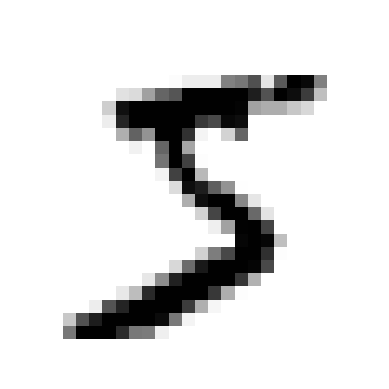

5


In [4]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

print(y[0])

In [6]:
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

# Performance of the Classification Model

## Accuracy Using Cross Validation


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

False


array([0.914 , 0.9145, 0.9145])

we dont use accuracy as a metric to check performance of a classification model especially we are dealing with skewed data(when some classes are much more frequent than others)

## Confusion Matrix


the general idea of a confusion matrix is to count the number of times instance of class A are classfied as Class B, for all A/B pairs.

It also performs k-fold cross validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

By this we get clean prediction for each instance in the training set.



In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[5375,  111],
       [ 120,  394]])

In the above output of the cell, In first row of this matrix: only 5375 of them were correctly classified as non-5s(they are called true negatives) while the remaining 111 of them were wrongly classfied as 5s(false positives also known as class type 1 errors)

In the second row of this matrix: only 120 of them were wrongly classified as non-5s(false negatives, also known as class type 2 errors) while remaining 394 were classified as 5s(true positives)

In [10]:
y_train_prefect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_prefect_predictions)


array([[5486,    0],
       [   0,  514]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.
A perfect classifer would only have true positive and true negatives, so its confusion matrix would have non zero values on its main diagonal
for example: array([[5486, 0],
                    [0, 514]])

An interesting way to look at is the accuracy of the positive predictions; this is called the precision of the classifiers

### Inline equation: precision = $\frac{TP}{TP \; + \; FP}$